<a href="https://colab.research.google.com/github/nick0413/Ai_ICBM/blob/main/Neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

se guardaron los modelos
0.8108487820088697


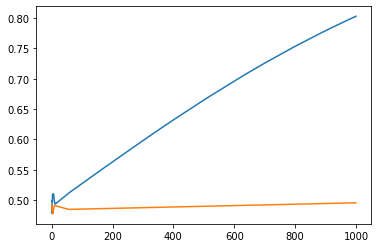

In [34]:
from itertools import cycle
import random
import sys
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
import matplotlib.pylab as plt

load_saved_pool = False
save_brains = True
brains = []
fitness = []
total_brains = 50

generation = 1

highest_fitness = -1
best_weights = []



def save_pool():
    for i in range(total_brains):
        brains[i].save_weights("Modelos/" + str(i) + ".keras")
    print('se guardaron los modelos')

def create_model():
    model = Sequential() #build it one by one

    model.add(Dense(5, input_shape=(5,)))       # we need phi and theta start and end plus time
    model.add(Activation('relu'))
    model.add(Dense(25, input_shape=(5,)))
    model.add(Activation('relu'))
    model.add(Dense(25, input_shape=(25,)))
    model.add(Activation('relu'))
    model.add(Dense(25, input_shape=(25,)))
    model.add(Activation('relu'))
    model.add(Dense(2, input_shape=(25,)))
    model.add(Activation('sigmoid'))            #constraint the output to the range (0,1)

    model.compile(loss='mse',optimizer='adam')  #it needs to be compiled even if we wont use gradient based optimization

    return model

def predict(phi_start,theta_start,phi_target,theta_target, brain_number,t):
    global brains 

    time=np.linspace(0,tmax,N)
    time=np.reshape(time,(N,1))
    data=np.ones((N,5))
    data[:,0]=data[:,0]*phi_start
    data[:,1]=data[:,1]*theta_start
    data[:,2]=data[:,2]*phi_target
    data[:,3]=data[:,3]*theta_target
    data[:,4]=time.reshape(1,-1)

    input=data
    output = brains[brain_number].predict(input, 200,verbose=0)



    #input = np.asarray([phi_start,theta_start,phi_target,theta_target,t])
    #input = np.atleast_2d(input)                        #this is mandatory because keras models need ndarrays, not 1darrays
    #output = brains[brain_number].predict(input, 1)[0]  #second argument refers to batch size, we only have one set of data
                                                        #we can only have a batch size of one

    return output #array of values predicted by the network

def model_crossover(parent1, parent2):
  global brains

  weight1 = brains[parent1].get_weights()[0]  #it brings weights and biases
                                              #model.get_weights()[0] are the wieghts 
                                              #model.get_weights()[1] are the biases   
  weight2 = brains[parent2].get_weights()[0] 

  new_weight1 = weight1
  new_weight2 = weight2

  gene = random.randint(0,len(new_weight1)-1) #we change a random we

  new_weight1[gene] = weight2[gene]
  new_weight2[gene] = weight1[gene]

  return np.asarray([new_weight1,new_weight2])

def model_mutate(weights):
    for i in range(len(weights)):
        for j in range(len(weights[i])):
            if( random.uniform(0,1) < 0.15): #learing rate of 15%
                change = random.uniform(-0.5,0.5)
                weights[i][j] += change
    return weights

def start():# crea la primera generacion de modelos
    for i in range(total_brains):
        model = create_model()
        brains.append(model) 
        fitness.append(-100)
    if load_saved_pool:
      for i in range(total_brains):
          brains[i].load_weights("Modelos/" + str(i) + ".keras")

def f1(x):
  return 1-(x/1000)**2
def f2(x):
  return np.sin(x/100)

def false_fitness(time,power,alpha):
  B=f1(time)
  fit1=((power - B)**2).mean(axis=0)
  C=f2(time)
  fit2=((alpha - C)**2).mean(axis=0)
  fitness=fit1+fit2
  return fitness

  




start() 
save_pool()
tmax=1000
dt=0.5
N=int(tmax/dt)


phi1=np.pi/4
theta1=np.pi/3


phi2=np.pi/6
theta2=np.pi/2


h=predict(phi1,theta1,phi2,theta2,15,3)

#print(h)
time=np.linspace(0,tmax,N)

f=false_fitness(time,h[:,0],h[:,1])
print(f)
plt.plot(time,h[:,1])
plt.plot(time,h[:,0])

In [ ]:
import numpy as np

def sigmoid(x):# funcion de activacion
  return 1/(1+np.exp(-x))

class net:
  def __init__(self,net): #net es una lista de n elementos, n capas de la red
    # cada elemento en net es una lista de 2 componentes. El primer componente indica si es la capa de entrada
    #net[i]: capa i
    #net[i][0]: bool=true si es la primera capa
    #net[i][1]: la cantidad de neuronas en la capa
    
    self.weights =[] #todos los pesos de la red se van a guardar en una lista
    #    Explicacion     https://docs.google.com/presentation/d/1tPkW4nznmB05hlCRgbsW8JMxQZx9HLxs-5UL0o8oo-A/edit?usp=sharing
    self.fitness=0 # es que tan adecuadamente cumplio la mision, se le asgina 

    for layer in net: #para cada capa en la red
      if layer[0] !=None: #si no es la capa de entrada
        input=layer[0]    #entonces entran datos a fuerza
      else:
        input=net[net.index(layer)-1][1]#la cantidad de datos que entran  de

      output=layer[1]         

      self.weights.append(    np.random.rand(input,output)     )

  def propagate(self, data):
    in_data=data
    for i in range(len(self.weights)):
      print(i,in_data)
      
      z=np.dot(in_data,self.weights[i])
      a=sigmoid(z)
      in_data=a

    out=in_data
    return out

  def check(self):
    for Layer in self.weights:
      print(Layer)
      print('--------------------')
  

net_structure=[[3,5],[None,5],[None,5]]

n1=net(net_structure)
N=3
X=np.linspace(0,10,N)
Y=n1.check()
print(Y)
print('Done')


u=[[x]]
x=u[0]


[[0.72253186 0.20088265 0.06648296 0.06693453 0.48644095]
 [0.5924671  0.6403751  0.27858943 0.89579208 0.01368262]
 [0.33365055 0.70996951 0.08740745 0.24657334 0.06258576]]
--------------------
[[0.18874162 0.94858023 0.04842145 0.78645777 0.55466555]
 [0.58342367 0.45953474 0.11556773 0.57982384 0.74441814]
 [0.66219778 0.6058237  0.58493013 0.93292724 0.84917104]
 [0.12093769 0.38860849 0.62137099 0.78670936 0.150435  ]
 [0.83168098 0.60044548 0.4525836  0.80788843 0.43445373]]
--------------------
[[0.5189754  0.64682752 0.32016973 0.27861416 0.87836538]
 [0.1682615  0.91337737 0.80514997 0.69818079 0.92942118]
 [0.53794217 0.50647592 0.84939955 0.96978494 0.66985642]
 [0.65396505 0.83744072 0.02992111 0.55458148 0.88000474]
 [0.11725649 0.29949427 0.4225382  0.81787065 0.58632289]]
--------------------
None
Done
